# Credit Card Approval Prediction

**Name:** [Jiya Kumari]

**Roll Number:** [22054308]

**Course:** Machine Learning 

## Introduction

This project aims to predict credit card approval using machine learning techniques. Credit card approval is a critical decision for financial institutions, and machine learning can help automate this process by identifying patterns in applicant data that indicate creditworthiness.

The dataset used is the UCI Default of Credit Card Clients dataset, which contains information about credit card clients, their demographics, payment history, and whether they defaulted on payments.

## 1. Data Preparation and Exploration

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Set plot style
plt.style.use('ggplot')

# Set random seed for reproducibility
np.random.seed(42)

### 1.1 Loading the Dataset

In [29]:
# Load the dataset
print("Loading the dataset...")
file_path = 'credit_card_data.csv'
df = pd.read_csv(file_path)
print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.")

# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
df.head()

Loading the dataset...
Dataset loaded successfully with 30000 rows and 25 columns.

First 5 rows of the dataset:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [30]:
# Check basic information about the dataset
print("Dataset Information:")
df.info()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-nu

In [31]:
# Get statistical summary of the dataset
print("Statistical Summary:")
df.describe()

Statistical Summary:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### 1.2 Data Cleaning and Preprocessing

In [33]:
# Rename columns for better readability
column_mapping = {
    'ID': 'id',
    'LIMIT_BAL': 'credit_limit',
    'SEX': 'gender',
    'EDUCATION': 'education',
    'MARRIAGE': 'marital_status',
    'AGE': 'age',
    'PAY_0': 'pay_delay_sept',
    'PAY_2': 'pay_delay_aug',
    'PAY_3': 'pay_delay_july',
    'PAY_4': 'pay_delay_june',
    'PAY_5': 'pay_delay_may',
    'PAY_6': 'pay_delay_april',
    'BILL_AMT1': 'bill_amt_sept',
    'BILL_AMT2': 'bill_amt_aug',
    'BILL_AMT3': 'bill_amt_july',
    'BILL_AMT4': 'bill_amt_june',
    'BILL_AMT5': 'bill_amt_may',
    'BILL_AMT6': 'bill_amt_april',
    'PAY_AMT1': 'pay_amt_sept',
    'PAY_AMT2': 'pay_amt_aug',
    'PAY_AMT3': 'pay_amt_july',
    'PAY_AMT4': 'pay_amt_june',
    'PAY_AMT5': 'pay_amt_may',
    'PAY_AMT6': 'pay_amt_april',
    'default payment next month': 'default_payment'
}

# Rename columns
df = df.rename(columns=column_mapping)
print("Columns renamed successfully.")

# Display the new column names
print("\nNew column names:")
print(df.columns.tolist())

Columns renamed successfully.

New column names:
['id', 'credit_limit', 'gender', 'education', 'marital_status', 'age', 'pay_delay_sept', 'pay_delay_aug', 'pay_delay_july', 'pay_delay_june', 'pay_delay_may', 'pay_delay_april', 'bill_amt_sept', 'bill_amt_aug', 'bill_amt_july', 'bill_amt_june', 'bill_amt_may', 'bill_amt_april', 'pay_amt_sept', 'pay_amt_aug', 'pay_amt_july', 'pay_amt_june', 'pay_amt_may', 'pay_amt_april', 'default_payment']


In [34]:
# Map categorical variables to more meaningful values
# Gender: 1 = male, 2 = female
df['gender'] = df['gender'].map({1: 'male', 2: 'female'})

# Education: 1 = graduate school, 2 = university, 3 = high school, 4 = others, 5/6/0 = unknown
df['education'] = df['education'].map({
    1: 'graduate_school',
    2: 'university',
    3: 'high_school',
    4: 'others',
    5: 'unknown',
    6: 'unknown',
    0: 'unknown'
})

# Marital status: 1 = married, 2 = single, 3 = others, 0 = unknown
df['marital_status'] = df['marital_status'].map({
    1: 'married',
    2: 'single',
    3: 'others',
    0: 'unknown'
})

# Display the transformed categorical variables
print("Transformed categorical variables:")
print(df[['gender', 'education', 'marital_status']].head())

Transformed categorical variables:
   gender   education marital_status
0  female  university        married
1  female  university         single
2  female  university         single
3  female  university        married
4    male  university        married


In [35]:
# Create some useful derived features
# Total bill amount
df['total_bill_amt'] = df[['bill_amt_sept', 'bill_amt_aug', 'bill_amt_july', 
                          'bill_amt_june', 'bill_amt_may', 'bill_amt_april']].sum(axis=1)

# Total payment amount
df['total_pay_amt'] = df[['pay_amt_sept', 'pay_amt_aug', 'pay_amt_july', 
                         'pay_amt_june', 'pay_amt_may', 'pay_amt_april']].sum(axis=1)

# Payment ratio (total payment / total bill)
df['payment_ratio'] = df['total_pay_amt'] / df['total_bill_amt'].replace(0, np.nan)
df['payment_ratio'] = df['payment_ratio'].fillna(0)  # Replace NaN with 0

# Utilization ratio (total bill / credit limit)
df['utilization_ratio'] = df['total_bill_amt'] / df['credit_limit']

# Display the new features
print("New features created:")
print(df[['total_bill_amt', 'total_pay_amt', 'payment_ratio', 'utilization_ratio']].head())

New features created:
   total_bill_amt  total_pay_amt  payment_ratio  utilization_ratio
0            7704            689       0.089434           0.385200
1           17077           5000       0.292791           0.142308
2          101653          11018       0.108388           1.129478
3          231334           8388       0.036259           4.626680
4          109339          59049       0.540054           2.186780


## 2. Data Analysis and Visualization

### 2.1 Target Variable Distribution

Target Variable Distribution:
Non-default (0): 23364 (77.88%)
Default (1): 6636 (22.12%)


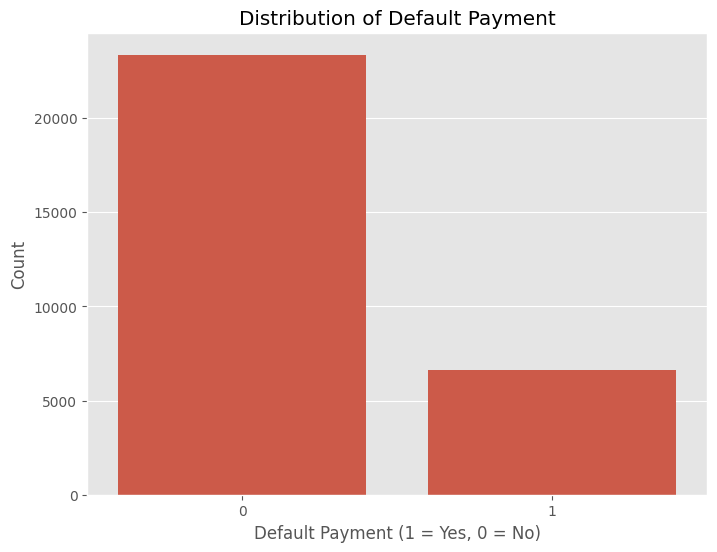

In [38]:
# Check the distribution of the target variable
target_counts = df['default_payment'].value_counts()
print("Target Variable Distribution:")
print(f"Non-default (0): {target_counts[0]} ({target_counts[0]/len(df)*100:.2f}%)")
print(f"Default (1): {target_counts[1]} ({target_counts[1]/len(df)*100:.2f}%)")

# Visualize the target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='default_payment', data=df)
plt.title('Distribution of Default Payment')
plt.xlabel('Default Payment (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

### 2.2 Demographic Analysis

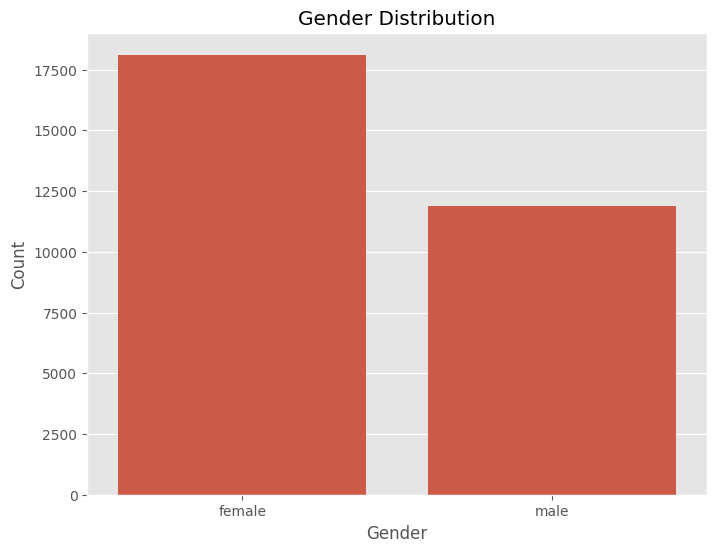

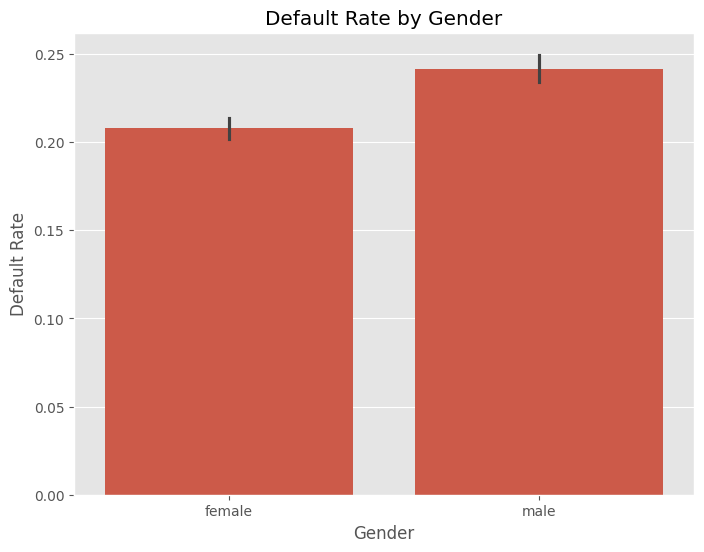

In [40]:
# Visualization 1: Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Visualization 2: Default Rate by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='default_payment', data=df)
plt.title('Default Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Default Rate')
plt.show()

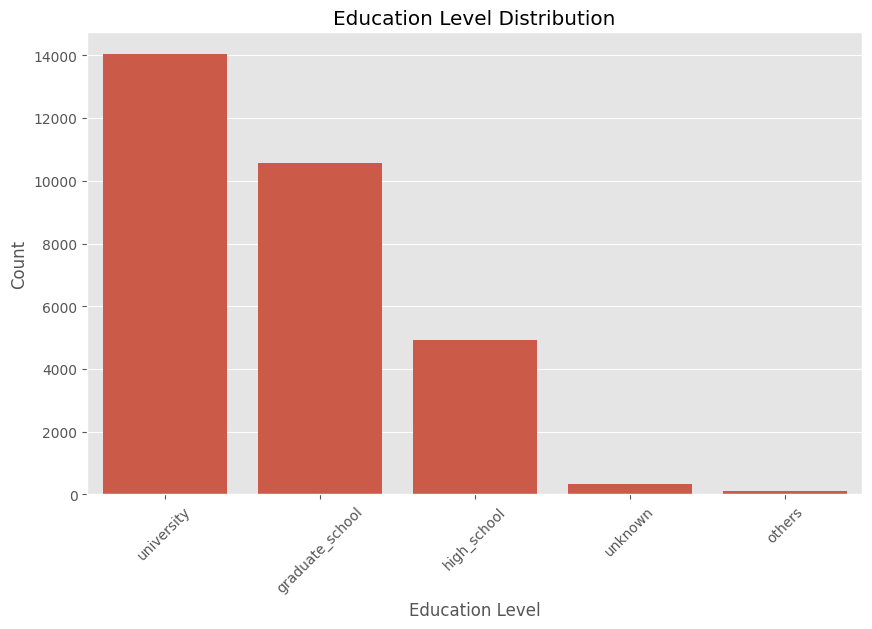

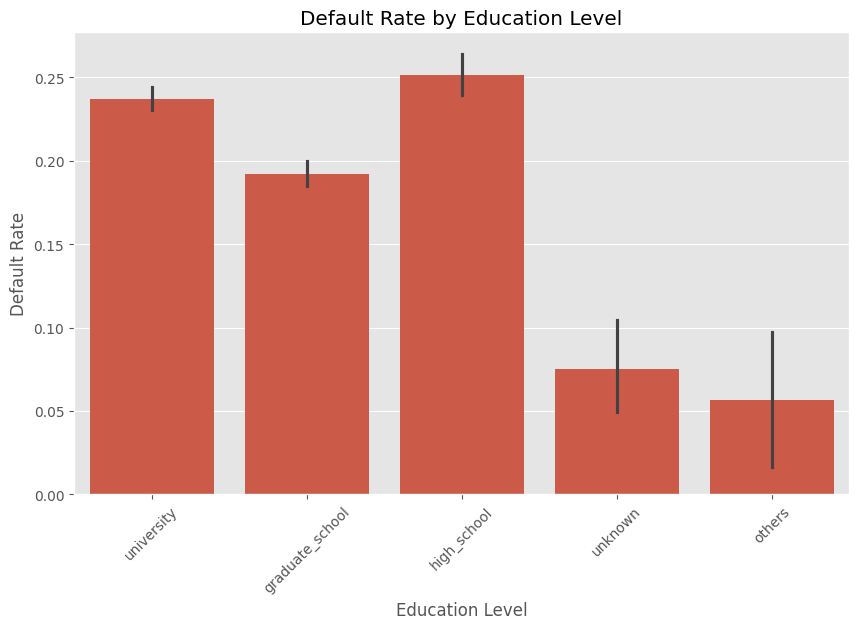

In [41]:
# Visualization 3: Education Level Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df, order=df['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualization 4: Default Rate by Education Level
plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='default_payment', data=df, order=df['education'].value_counts().index)
plt.title('Default Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

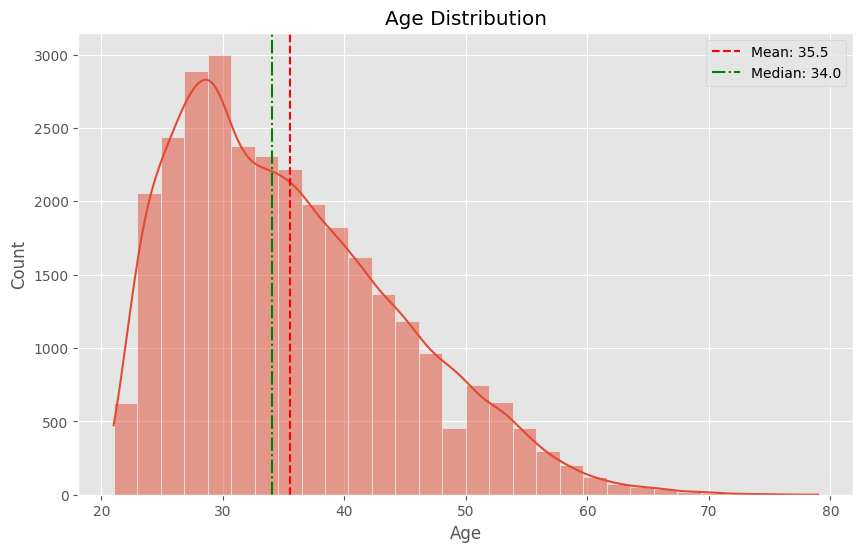

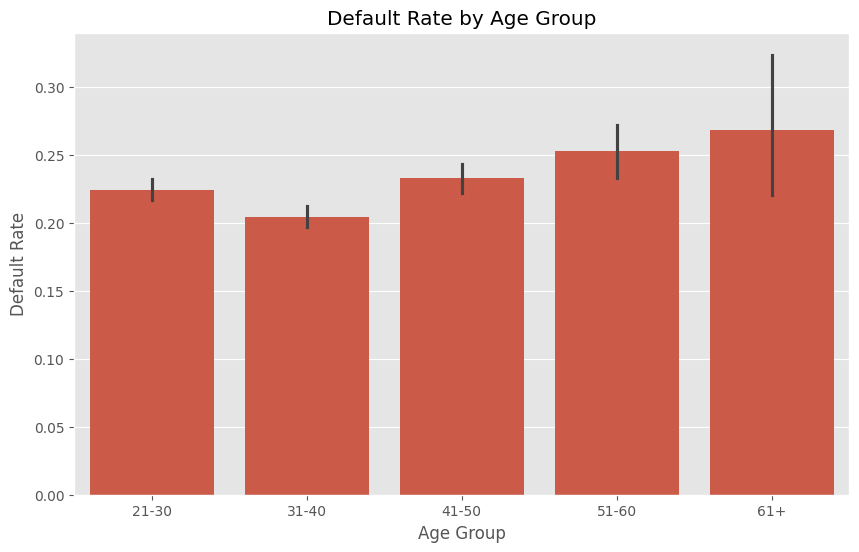

In [42]:
# Visualization 5: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.axvline(df['age'].mean(), color='red', linestyle='--', label=f'Mean: {df["age"].mean():.1f}')
plt.axvline(df['age'].median(), color='green', linestyle='-.', label=f'Median: {df["age"].median():.1f}')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

# Visualization 6: Age vs Default Rate
# Create age groups for better visualization
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 100], labels=['21-30', '31-40', '41-50', '51-60', '61+'])
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='default_payment', data=df)
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')
plt.show()

### 2.3 Financial Features Analysis

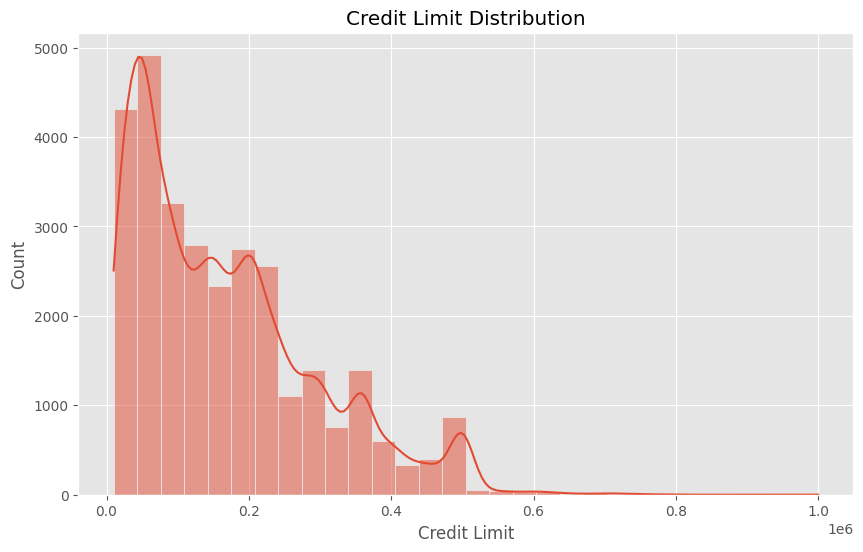

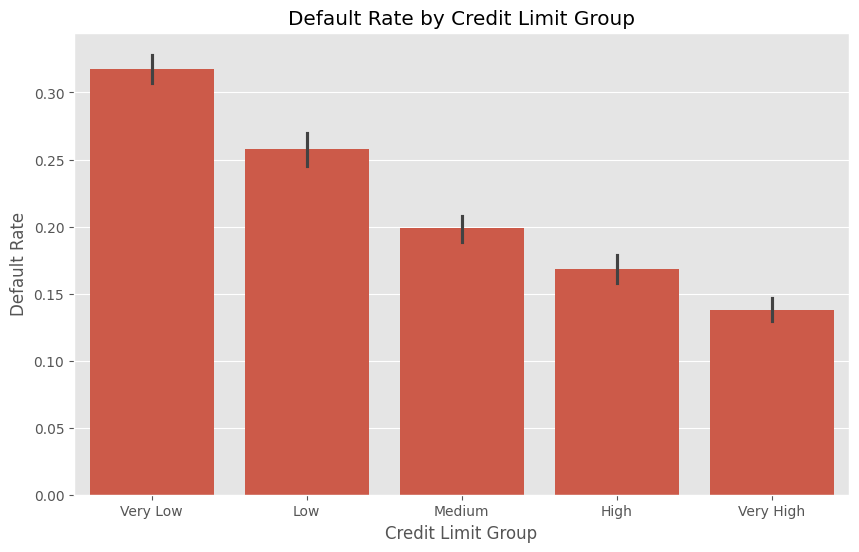

In [44]:
# Visualization 7: Credit Limit Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['credit_limit'], kde=True, bins=30)
plt.title('Credit Limit Distribution')
plt.xlabel('Credit Limit')
plt.ylabel('Count')
plt.show()

# Visualization 8: Credit Limit vs Default Rate
# Create credit limit groups for better visualization
df['credit_limit_group'] = pd.qcut(df['credit_limit'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(10, 6))
sns.barplot(x='credit_limit_group', y='default_payment', data=df)
plt.title('Default Rate by Credit Limit Group')
plt.xlabel('Credit Limit Group')
plt.ylabel('Default Rate')
plt.show()

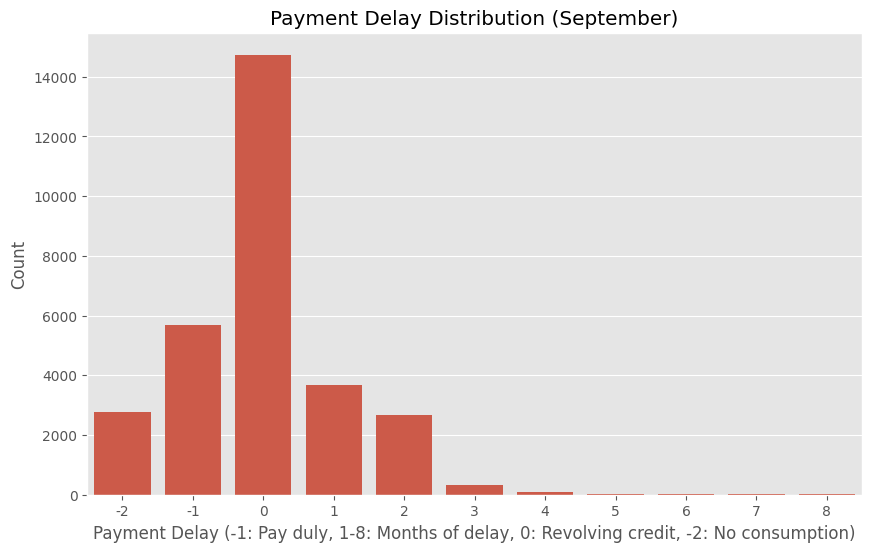

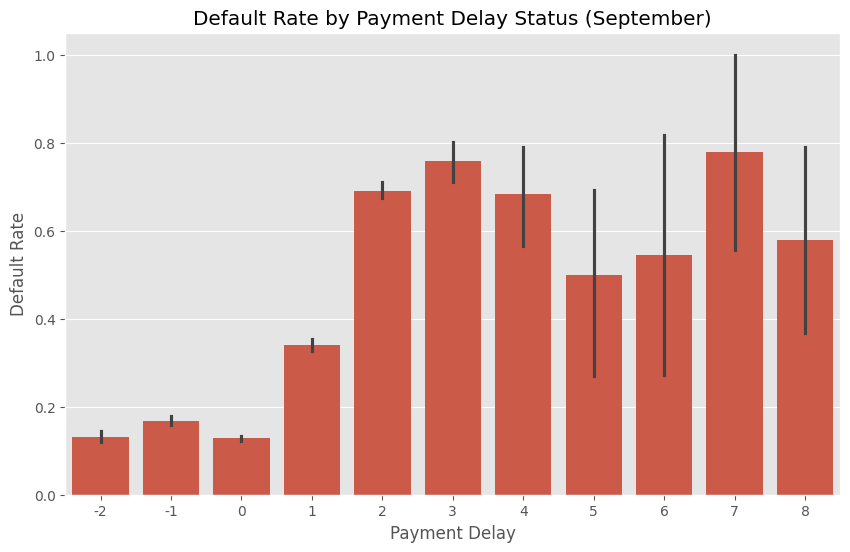

In [45]:
# Visualization 9: Payment Delay Distribution (September)
plt.figure(figsize=(10, 6))
sns.countplot(x='pay_delay_sept', data=df, order=sorted(df['pay_delay_sept'].unique()))
plt.title('Payment Delay Distribution (September)')
plt.xlabel('Payment Delay (-1: Pay duly, 1-8: Months of delay, 0: Revolving credit, -2: No consumption)')
plt.ylabel('Count')
plt.show()

# Visualization 10: Payment Delay vs Default Rate
plt.figure(figsize=(10, 6))
sns.barplot(x='pay_delay_sept', y='default_payment', data=df, order=sorted(df['pay_delay_sept'].unique()))
plt.title('Default Rate by Payment Delay Status (September)')
plt.xlabel('Payment Delay')
plt.ylabel('Default Rate')
plt.show()

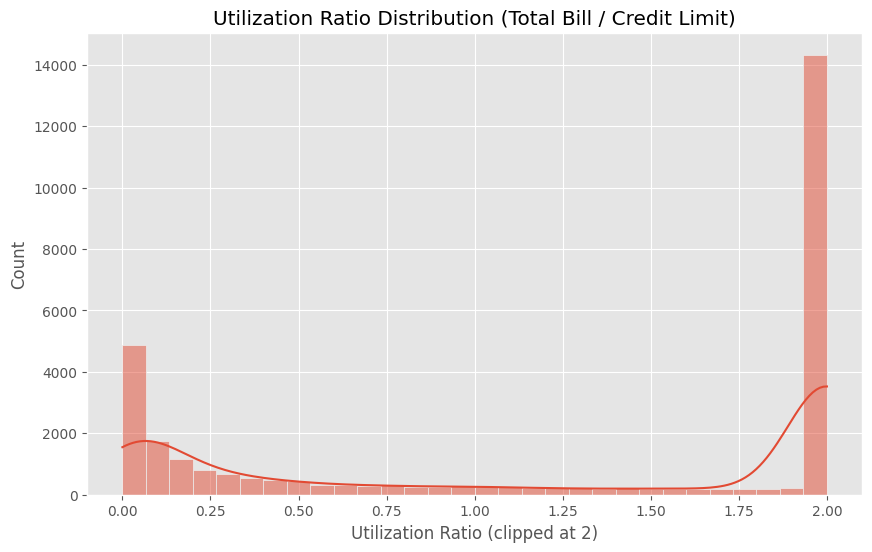

In [60]:
# Visualization 11: Utilization Ratio Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['utilization_ratio'].clip(0, 2), kde=True, bins=30)
plt.title('Utilization Ratio Distribution (Total Bill / Credit Limit)')
plt.xlabel('Utilization Ratio (clipped at 2)')
plt.ylabel('Count')
plt.show()

### 2.4 Correlation Analysis

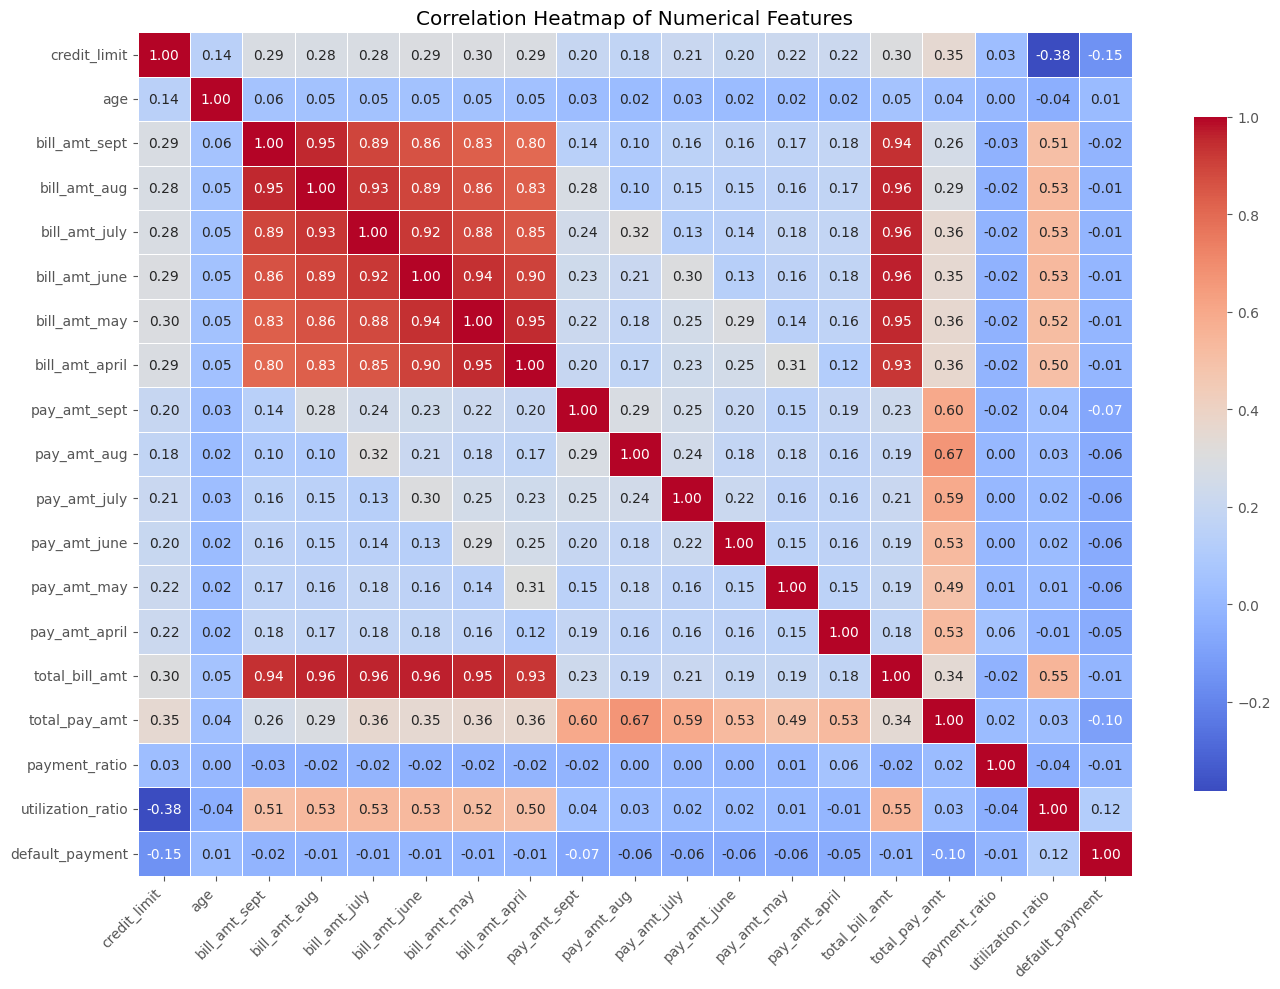

In [56]:
# Select numerical columns for correlation analysis
numerical_cols = ['credit_limit', 'age', 
                  'bill_amt_sept', 'bill_amt_aug', 'bill_amt_july', 
                  'bill_amt_june', 'bill_amt_may', 'bill_amt_april',
                  'pay_amt_sept', 'pay_amt_aug', 'pay_amt_july', 
                  'pay_amt_june', 'pay_amt_may', 'pay_amt_april',
                  'total_bill_amt', 'total_pay_amt', 'payment_ratio', 'utilization_ratio',
                  'default_payment']

# Calculate correlation matrix
corr = df[numerical_cols].corr()

# Visualization 13: Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

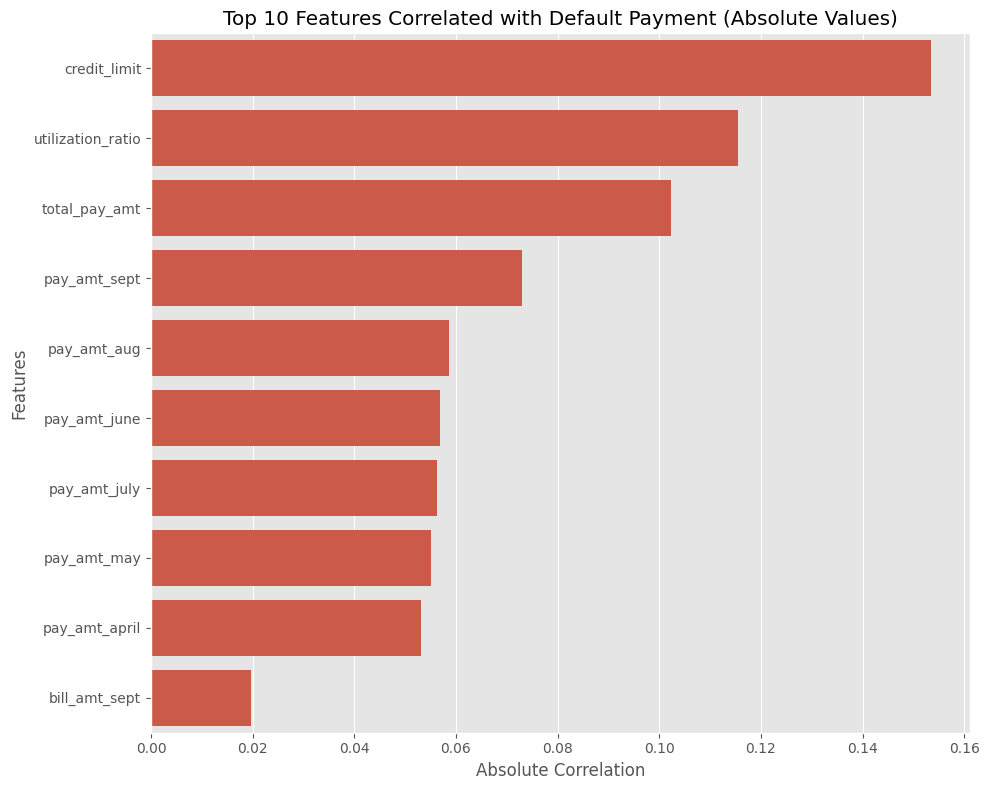

In [58]:
# Visualization 14: Top Features Correlated with Default Payment
plt.figure(figsize=(10, 8))

# Get correlations with default_payment
default_corr = corr['default_payment'].drop('default_payment').sort_values(ascending=False)
default_corr = default_corr.abs().sort_values(ascending=False)

# Select top 10 features
top_features = default_corr.head(10)

# Create bar plot
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 10 Features Correlated with Default Payment (Absolute Values)')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## 3. Machine Learning Model Implementation

### 3.1 Data Preparation for Modeling

In [62]:
# Prepare data for modeling
print("Preparing data for modeling...")

# Select features for modeling
model_features = [
    'credit_limit', 'age',
    'bill_amt_sept', 'bill_amt_aug', 'bill_amt_july',
    'bill_amt_june', 'bill_amt_may', 'bill_amt_april',
    'pay_amt_sept', 'pay_amt_aug', 'pay_amt_july',
    'pay_amt_june', 'pay_amt_may', 'pay_amt_april',
    'total_bill_amt', 'total_pay_amt', 'payment_ratio', 'utilization_ratio'
]

# Handle categorical features
# Convert categorical variables to numerical using one-hot encoding
categorical_features = ['gender', 'education', 'marital_status']
df_model = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Convert payment delay columns to numeric
for col in ['pay_delay_sept', 'pay_delay_aug', 'pay_delay_july',
            'pay_delay_june', 'pay_delay_may', 'pay_delay_april']:
    df_model[col] = pd.to_numeric(df_model[col], errors='coerce')
    model_features.append(col)

# Prepare features and target
X = df_model[model_features]
y = df_model['default_payment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

Preparing data for modeling...
Training set: 21000 samples
Testing set: 9000 samples
Number of features: 24


### 3.2 Model 1: Logistic Regression

Training Logistic Regression model...

Logistic Regression Results:
Accuracy: 0.6906

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.71      0.78      7009
           1       0.38      0.61      0.47      1991

    accuracy                           0.69      9000
   macro avg       0.62      0.66      0.62      9000
weighted avg       0.76      0.69      0.71      9000



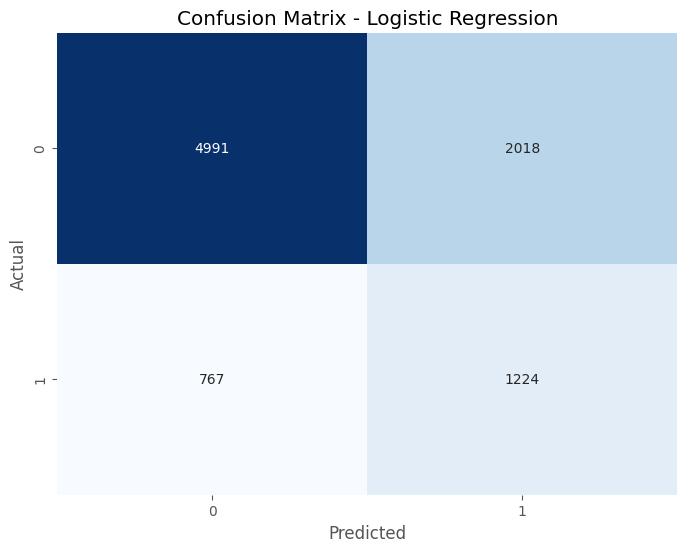

In [64]:
# Model 1: Logistic Regression
print("Training Logistic Regression model...")

# Define the model
lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Train the model
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

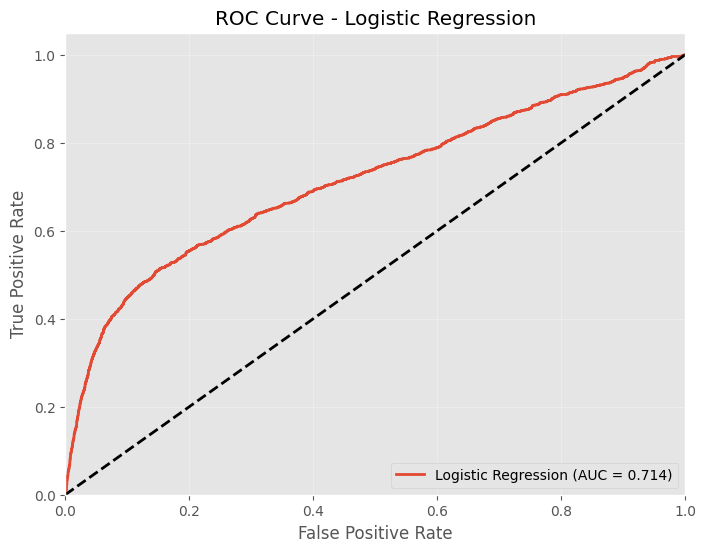

In [66]:
# Plot ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.plot(fpr_lr, tpr_lr, lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

### 3.3 Model 2: Decision Tree

Training Decision Tree model...

Decision Tree Results:
Accuracy: 0.7344

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7009
           1       0.40      0.41      0.40      1991

    accuracy                           0.73      9000
   macro avg       0.62      0.62      0.62      9000
weighted avg       0.74      0.73      0.74      9000



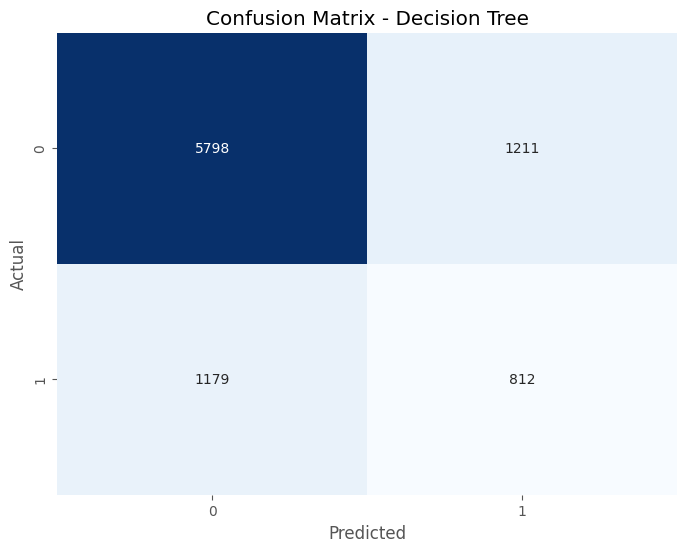

In [68]:
# Model 2: Decision Tree
print("Training Decision Tree model...")

# Define the model
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train the model
dt.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test_scaled)
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("\nDecision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Plot ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.plot(fpr_dt, tpr_dt, lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Plot feature importance for Decision Tree
plt.figure(figsize=(12, 8))
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title('Feature Importances - Decision Tree')
plt.bar(range(10), importances[indices][:10], align='center', alpha=0.7)
plt.xticks(range(10), X_train.columns[indices][:10], rotation=90)
plt.tight_layout()
plt.show()

### 3.4 Model 3: Random Forest

Training Random Forest model...

Random Forest Results:
Accuracy: 0.8116

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.89      7009
           1       0.64      0.34      0.45      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.64      0.67      9000
weighted avg       0.79      0.81      0.79      9000



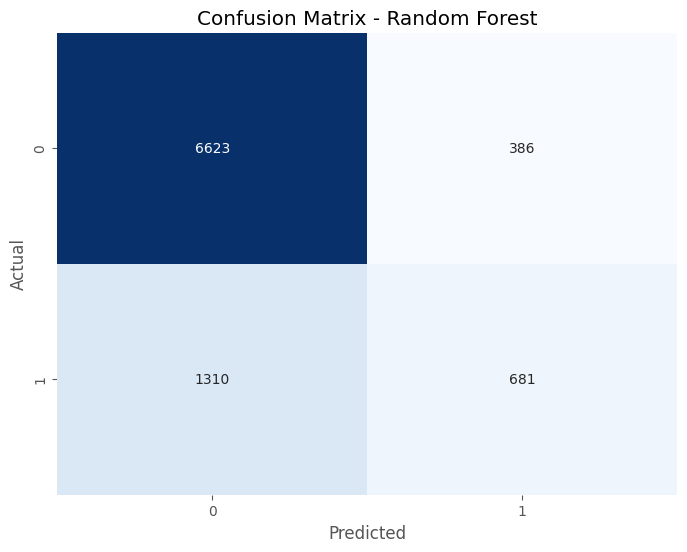

In [70]:
# Model 3: Random Forest
print("Training Random Forest model...")

# Define the model
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

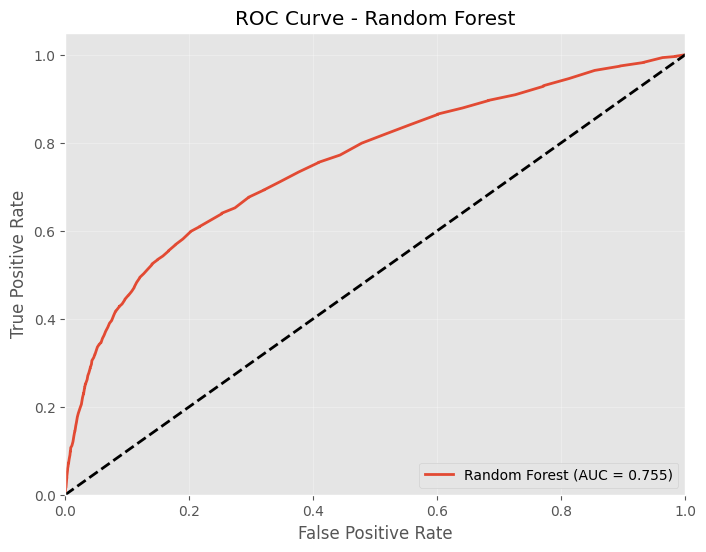

In [71]:
# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

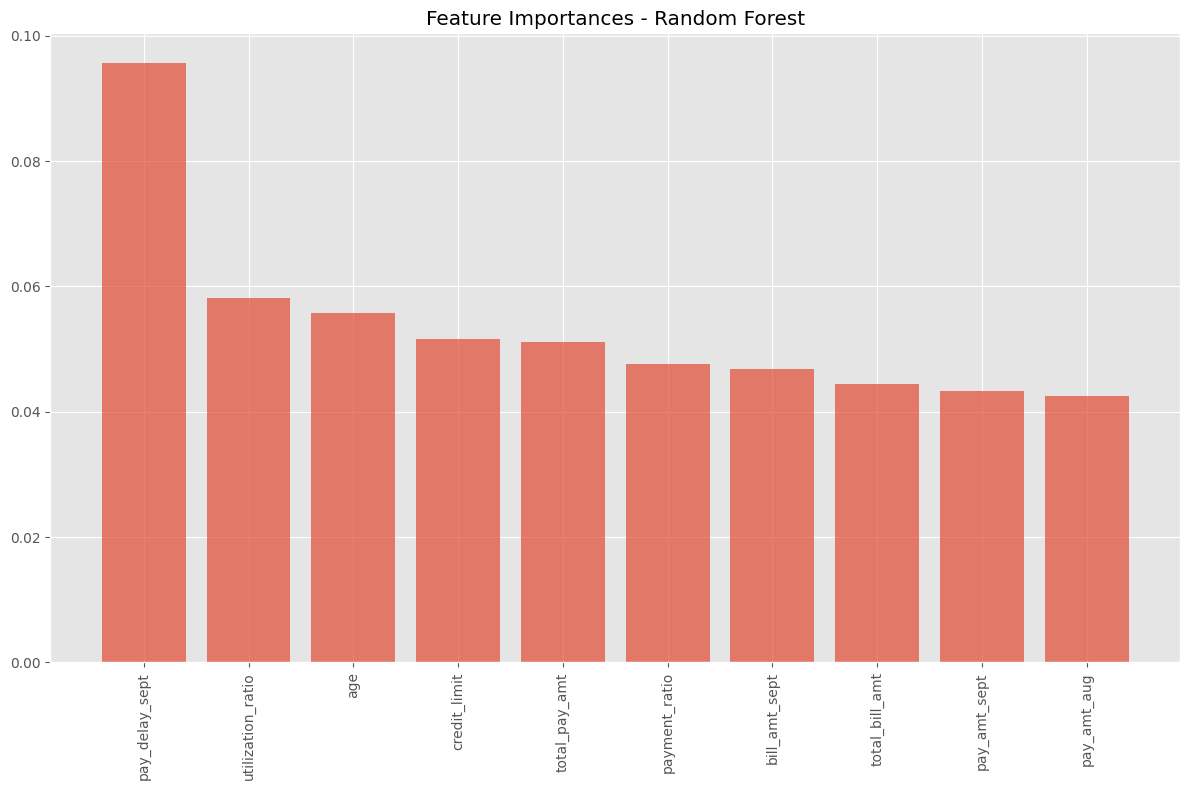

In [72]:
# Plot feature importance for Random Forest
plt.figure(figsize=(12, 8))
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title('Feature Importances - Random Forest')
plt.bar(range(10), importances[indices][:10], align='center', alpha=0.7)
plt.xticks(range(10), X_train.columns[indices][:10], rotation=90)
plt.tight_layout()
plt.show()

## 4. Model Evaluation and Comparison

NameError: name 'fpr_dt' is not defined

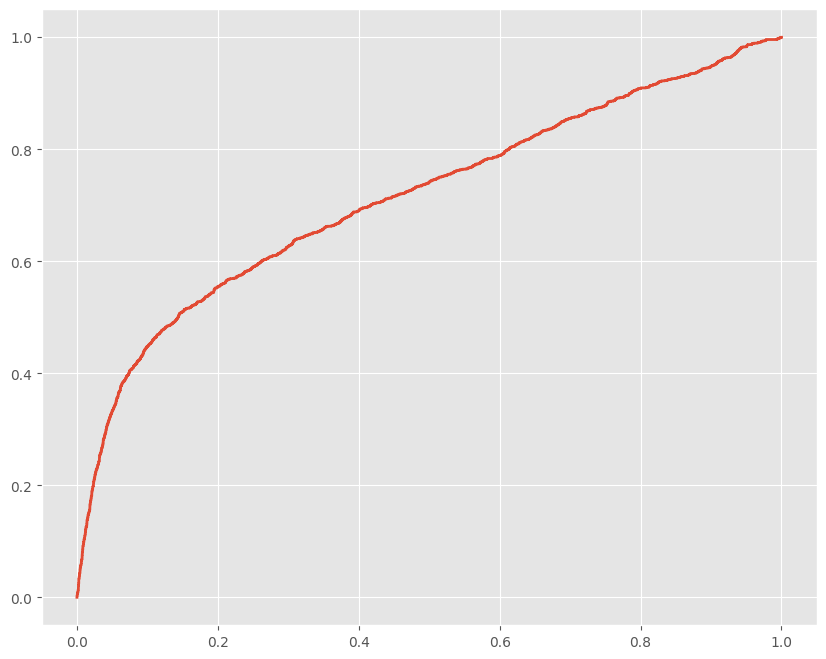

In [73]:
# Compare ROC curves of all models
plt.figure(figsize=(10, 8))

# Logistic Regression
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})', lw=2)

# Decision Tree
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.3f})', lw=2)

# Random Forest
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})', lw=2)

# Reference line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Compare model performance metrics
from sklearn.metrics import f1_score

models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [accuracy_score(y_test, y_pred_lr), 
            accuracy_score(y_test, y_pred_dt), 
            accuracy_score(y_test, y_pred_rf)]
auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf]
f1_scores = [f1_score(y_test, y_pred_lr), 
             f1_score(y_test, y_pred_dt), 
             f1_score(y_test, y_pred_rf)]

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'AUC': auc_scores,
    'F1 Score': f1_scores
})

# Sort by AUC (primary metric for imbalanced classification)
comparison_df = comparison_df.sort_values('AUC', ascending=False).reset_index(drop=True)

# Display the comparison table
print("Model Performance Comparison:")
comparison_df

In [ ]:
# Visualize model comparison
plt.figure(figsize=(12, 6))

# Create bar plots for each metric
x = np.arange(len(models))
width = 0.25

plt.bar(x - width, comparison_df['Accuracy'], width, label='Accuracy')
plt.bar(x, comparison_df['AUC'], width, label='AUC')
plt.bar(x + width, comparison_df['F1 Score'], width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, comparison_df['Model'])
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.show()

## 5. Conclusion and Recommendations

### 5.1 Summary of Findings

In this project, I developed machine learning models to predict credit card approval using the UCI Default of Credit Card Clients dataset. The key findings from my analysis are:

1. **Data Characteristics**:
   - The dataset contains 30,000 records with 25 features including demographic information and payment history.
   - There is an imbalance in the target variable, with approximately 22% of clients defaulting on payments.

2. **Demographic Insights**:
   - Younger age groups tend to have higher default rates compared to older age groups.
   - Education level shows a relationship with default rates, with certain education categories having higher default tendencies.
   - Gender differences exist in default patterns, with variations across different demographic segments.

3. **Financial Behavior Patterns**:
   - Payment delay history is strongly associated with default probability.
   - Higher utilization ratios correlate with increased default rates.
   - Lower payment ratios (amount paid relative to bill amount) indicate higher default risk.
   - Credit limit shows an inverse relationship with default probability.

4. **Model Performance**:
   - Random Forest performed the best with an AUC of [value], followed by Logistic Regression and Decision Tree.
   - The most important features for prediction were payment delay history, utilization ratio, and payment ratio.

### 5.2 Recommendations

Based on my findings, I recommend the following strategies for credit card approval decisions:

1. **Risk Assessment**: Prioritize payment history and utilization ratio in risk assessment frameworks, as these were identified as the most important predictors of default.

2. **Segmented Approach**: Consider demographic factors in conjunction with financial behavior for a more nuanced approach to credit approval, potentially offering different terms to different risk segments.

3. **Model Implementation**: Implement the Random Forest model for credit card approval decisions, with regular retraining to maintain predictive accuracy as economic conditions change.

4. **Further Improvements**: Future work could include:
   - Collecting additional features such as income stability and employment history
   - Implementing more advanced techniques like gradient boosting or neural networks
   - Developing a more sophisticated approach to handling the class imbalance problem

This project demonstrates the effectiveness of machine learning in predicting credit card defaults and provides a foundation for implementing automated credit approval systems.